# Working with videos
> Cheat sheet for videos in python

- toc: true 
- badges: true
- categories: [jupyter]

![](ghtop_images/header2.png)

## Intoduction

Some bits of python code to use videos

In [4]:
#hide
loca='C:\\Users\\44781\\Documents\\GitHub\\GolfSwingTSimm\\data\\golfDB.pkl'

## Some imports

In [5]:
import pandas as pd
import os
import cv2
import numpy as np

df = pd.read_pickle(loca)

idUSE = 6

df1=df.loc[idUSE]


## Youtube videos

Can have various issues so check https://pytube.io/en/latest/user/install.html if issues in use.

I used `!pip install pytube` then after a week I was getting errors. So in terminal I did 

`!pip install pytube` then clone directory 

`git clone git://github.com/pytube/pytube.git` and finally install 

`cd pytube`
`python -m pip install .`

Import the module, and here I'll use the golf dataset from another post

In [8]:
from pytube import YouTube

ytID=df1['youtube_id']
yt = YouTube('http://youtube.com/watch?v='+ytID)

The youtube object contains several videos in different formats. 

In [16]:
#collapse-output
yt.streams

[<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="7fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="vid

We can then filter the results based on criteria. By running `yt.streams.filter??` we can see more on the code, as shown below

In [19]:
Signature:
yt.streams.filter(
    fps=None,
    res=None,
    resolution=None,
    mime_type=None,
    type=None,
    subtype=None,
    file_extension=None,
    abr=None,
    bitrate=None,
    video_codec=None,
    audio_codec=None,
    only_audio=None,
    only_video=None,
    progressive=None,
    adaptive=None,
    is_dash=None,
    custom_filter_functions=None,
)

In [26]:
streams= yt.streams.filter(file_extension='mp4',res='360p')
streams

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="134" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.4d401e" progressive="False" type="video">]

Download the stream

In [65]:
streams.first().download(filename=ytID+'.mp4')

'C:\\Users\\44781\\Documents\\GitHub\\THS_website\\_notebooks\\iPuVhnI8pJU.mp4'

## Video Player

To play the videos I'll be using VLC. There can be some issues with installing so I used the exe file from here https://get.videolan.org/vlc/3.0.11/win64/vlc-3.0.11-win64.exe 

Another fix to install issues is inserting a line like `os.add_dll_directory("Location\anaconda3\\Lib\\site-packages")` into the script

More details of using VLC with Python can be found here https://bigl.es/tooling-tuesday-using-vlc-with-python/

Importing vlc and creating a media object and then playing it. 

In [102]:
import vlc

vidLoc=ytID+'.mp4'

media = vlc.MediaPlayer(vidLoc)

media.play()

0

![](ghtop_images/vlcgolf.png)

`.play` opens a player as shown above. Note there is no pause/play/rewind buttons and the player cannot be closed. The only way to close is to use the command `media.stop()` or restart the kernel

In [103]:
media.stop()

To make it more like a standard video player the following can be used:

- `media.play()` to play

- `media.pause()` to pause

- `media.set_rate(3)` to increase speed of video

- `media.get_time()` and `media.set_time(5)` to get and set the time of video

- `media.stop()` to close the video

Intsead of doing these on the command line it makes sense to have them as button presses. 

I'll use easygui here as it's quite easy and I'm not too bothered about the aesthetics or functionality. Because easygui is a bit clunky. https://bigl.es/tooling-tuesday-easygui/

So to use create a easygui buttonbox with different features to control the video. Once clicked the button will then close (can't keep same button open with this) and open again.

In [101]:
import easygui 


while True:
    choice = easygui.buttonbox(title="@Golf Media Player",
       choices=["Play","<<","<<<",">>",">>>","Pause","Stop"])

    if choice == "Play":
        media.set_rate(1)
        media.play()
    elif choice == "Pause":
        media.pause()
    elif choice ==">>":
        media.set_rate(2)
    elif choice==">>>":
        media.set_rate(4)
    elif choice=="<<":
        timo=media.get_time()
        timo=timo-2.5*1000
        if timo<0:
            timo=0
        media.set_time(timo)
    elif choice=="<<<":
        timo=media.get_time()
        timo=timo-5*1000
        if timo<0:
            timo=0
        media.set_time(timo)
    else:
        time_use = media.get_time()/1000
        print('the time is {}'.format(time_use))
        media.stop()
        break

the time is 15.652


![](ghtop_images/vlcgolf2.png)

## Extracting images from the video

To work with a video it is most often easier to convert it to an image. 

To do this I'll use `cv2` https://pypi.org/project/opencv-python/

First we create a cv2 object of the video with `cap = cv2.VideoCapture(vidLoc)` then `success, image = cap.read()` to get images as we scroll through the frames, as shown below.

In [110]:
#collapse-output
cap = cv2.VideoCapture(vidLoc)

success, image = cap.read()
while success:
    success, image = cap.read()
    print(success)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


Some useful features of the cap object that will be used are:
    
- `cap.get(cv2.CAP_PROP_POS_MSEC)` the duration of the video

- `cap.get(cv2.CAP_PROP_FRAME_COUNT)` the frame count

- `frame_count / fps` the duration in seconds (the previous two divided)

- `cv2.CAP_PROP_FRAME_WIDTH)` frame width

- `cv2.CAP_PROP_FRAME_HEIGHT)` frame height

- `cv2.copyMakeBorder()` to create an image object to save and select which area of the video to save

- `cv2.imwrite(fnom, img)` to save the frame as an image

We could instead use other ways as shown https://learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/ to extract images but I'll use the above
    

The below is modified from https://github.com/wmcnally/golfdb 

It creates images at a given frame where the video is cropped based on the variable bbox (which is between 0 and 1)

Note also `dim=600` which adjusts the size of the output image

In [148]:
         
def getImages(cap,bbox,frame_use):
    
    x = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) * bbox[0])
    y = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) * bbox[1])
    w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) * bbox[2])
    h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) * bbox[3])
    
    count = 0
    success, image = cap.read()
    while success:
        count += 1
        
        if abs(count-frame_use)==0:
                dim=600
                crop_img = image[y:y + h, x:x + w]
                crop_size = crop_img.shape[:2]
                ratio = dim / max(crop_size)
                new_size = tuple([int(x*ratio) for x in crop_size])
                resized = cv2.resize(crop_img, (new_size[1], new_size[0]))
                delta_w = dim - new_size[1]
                delta_h = dim - new_size[0]
                top, bottom = delta_h // 2, delta_h - (delta_h // 2)
                left, right = delta_w // 2, delta_w - (delta_w // 2)
                b_img = cv2.copyMakeBorder(resized, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                           value=[0.406*255, 0.456*255, 0.485*255])  # ImageNet means (BGR)
                cv2.imwrite(os.path.join(ytID+str(count)+".jpg"),b_img)
                
        elif count > frame_use:
            break
        success, image = cap.read()

        


And to run the above function

In [146]:
cap = cv2.VideoCapture(vidLoc)
getImages(cap,df1['bbox'],100)

In [155]:
event_names = {
    0: 'Address',
    1: 'Toe-up',
    2: 'Mid-backswing (arm parallel)',
    3: 'Top',
    4: 'Mid-downswing (arm parallel)',
    5: 'Impact',
    6: 'Mid-follow-through (shaft parallel)',
    7: 'Finish'
}
_, img = cap.read()
# cv2.imshow(event_names[0], img)

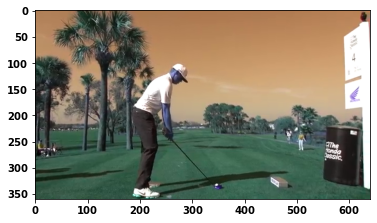

In [156]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [149]:
bbox

array([0.1453125 , 0.00138889, 0.46796875, 0.99930556])

![](iPuVhnI8pJU100.jpg)